In [1]:

import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

2025-07-14 03:18:04.909471: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752463085.284011      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752463085.391600      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
train='/kaggle/input/newaslsinhala/datasetSinha/train'
test='/kaggle/input/newaslsinhala/datasetSinha/test'
val='/kaggle/input/newaslsinhala/datasetSinha/val'
img=(224,224)
batchSize=64

In [3]:
datagen = ImageDataGenerator(rescale=1./255)

train_iterator = datagen.flow_from_directory(
    train,
    target_size=img,
    batch_size=batchSize,
    class_mode='categorical'
)
test_iterator = datagen.flow_from_directory(
    test,
    target_size=img,
    batch_size=batchSize,
    class_mode='categorical'
)
val_iterator = datagen.flow_from_directory(
    val,
    target_size=img,
    batch_size=batchSize,
    class_mode='categorical'
)

Found 16010 images belonging to 32 classes.
Found 2323 images belonging to 32 classes.
Found 1128 images belonging to 32 classes.


In [4]:

def create_model():
    base_model = tf.keras.applications.DenseNet201(
        input_shape=(224, 224, 3),
        include_top=False,
        weights='imagenet',
        pooling='avg'
    )

    x = base_model.output
    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.5)(x)
    output = Dense(train_iterator.num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=output)
    
    for layer in base_model.layers:
        layer.trainable = False
    model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=["accuracy"])
    return model

model = create_model()
history = model.fit(train_iterator,
                    epochs=30,
                    validation_data=val_iterator)

test_loss, test_accuracy = model.evaluate(test_iterator)
print(f'Test accuracy: {test_accuracy}')

I0000 00:00:1752463123.339767      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1752463123.340487      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


74836368/74836368 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30


I0000 00:00:1752463167.079943     118 service.cc:148] XLA service 0x7850240034d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1752463167.081290     118 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1752463167.081313     118 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1752463172.134417     118 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1752463199.483378     118 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


251/251 ━━━━━━━━━━━━━━━━━━━━ 326s 1s/step - accuracy: 0.6744 - loss: 1.2184 - val_accuracy: 0.9973 - val_loss: 0.0260
Epoch 2/30
251/251 ━━━━━━━━━━━━━━━━━━━━ 85s 339ms/step - accuracy: 0.9754 - loss: 0.0982 - val_accuracy: 0.9973 - val_loss: 0.0152
Epoch 3/30
251/251 ━━━━━━━━━━━━━━━━━━━━ 85s 339ms/step - accuracy: 0.9826 - loss: 0.0547 - val_accuracy: 0.9973 - val_loss: 0.0092
Epoch 4/30
251/251 ━━━━━━━━━━━━━━━━━━━━ 85s 339ms/step - accuracy: 0.9840 - loss: 0.0542 - val_accuracy: 0.9973 - val_loss: 0.0179
Epoch 5/30
251/251 ━━━━━━━━━━━━━━━━━━━━ 85s 339ms/step - accuracy: 0.9911 - loss: 0.0304 - val_accuracy: 0.9982 - val_loss: 0.0129
Epoch 6/30
251/251 ━━━━━━━━━━━━━━━━━━━━ 86s 342ms/step - accuracy: 0.9881 - loss: 0.0389 - val_accuracy: 0.9982 - val_loss: 0.0067
Epoch 7/30
251/251 ━━━━━━━━━━━━━━━━━━━━ 84s 333ms/step - accuracy: 0.9903 - loss: 0.0287 - val_accuracy: 0.9982 - val_loss: 0.0118
Epoch 8/30
251/251 ━━━━━━━━━━━━━━━━━━━━ 84s 334ms/step - accuracy: 0.9894 - loss: 0.0302 - val_a

In [5]:
model.save('/kaggle/working/modelDensenet201.h5')


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np

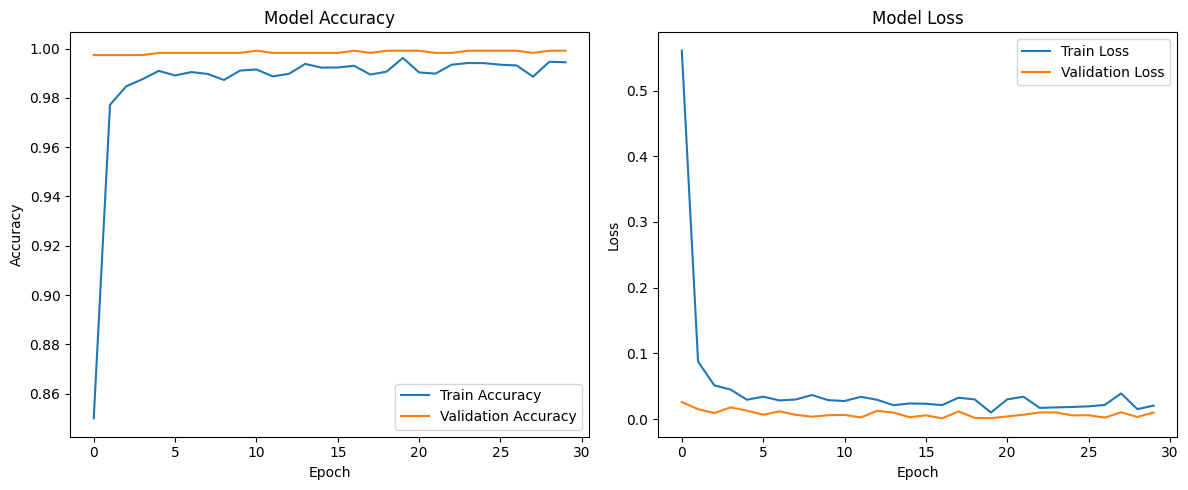

In [7]:
#curves
# curves
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'],      label='Train Accuracy')
plt.plot(history.history['val_accuracy'],  label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'],     label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 33s 158ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━

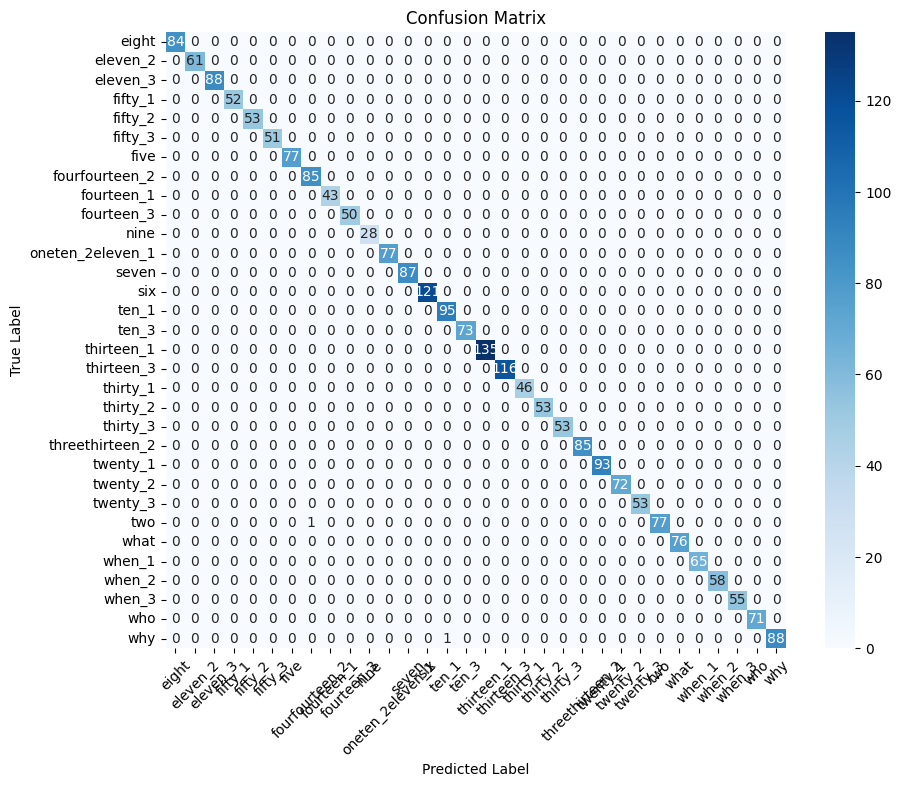

In [8]:
y_true = []
y_pred = []
for _ in range(len(test_iterator)):
    images, labels = next(test_iterator)
    y_true.extend(np.argmax(labels, axis=1))
    y_pred.extend(np.argmax(model.predict(images), axis=1))
    if len(y_true) >= len(test_iterator.filenames):
        break

cm = confusion_matrix(y_true, y_pred)
class_names = list(test_iterator.class_indices.keys())

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()